In [334]:
#libraries
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [335]:
# Game of Life with stochastic elements added

N = 300
n_iter = 2000

x_step = np.array([random.choice([-1,0,1]), random.choice([-1,0,1]),
                  random.choice([-1,0,1]), random.choice([-1,0,1])])
                   
y_step = np.array([random.choice([-1,0,1]), random.choice([-1,0,1]),
                  random.choice([-1,0,1]), random.choice([-1,0,1])])
direction = 1.0
helped = []
harmed = []

In [336]:
class Target():
    def __init__(self, pace = 1, capability = 1, propensity = 0.01, index = None):
        self.pace = random.randrange(1,5)
        self.capability = random.randrange(1,5)
        self.propensity = random.triangular(-0.1, 1.0, 0.1)
        
    def walking(self, x_step, y_step):
        if self.pace < 3:
            x_step = random.triangular(-1, 0.1, -0.6)
            y_step = random.triangular(-1, 0.1, -0.6)
        elif self.pace == 3:
            x_step = random.triangular(-0.1, 0.4, 0.2)
            y_step = random.triangular(-0.1, 0.4, 0.2)
        else:
            x_step = random.triangular(0.4, 1, 0.6)
            y_step = random.triangular(0.4, 1, 0.6)
        return (x_step, y_step)

In [337]:
class Helper(Target):
    def __init__(self): 
        Target.__init__(Target, pace = random.randrange(1,5), capability = 0, propensity = 0)
        self.pace = random.randrange(1,5)
        self.capability = random.randrange(1,5)
        self.propensity = random.triangular(-0.1, 1.0, 0.45)
        
    def helping(self, x_step, y_step):
        helped.append(Target().walking(x_step + 
                                       ((self.propensity**2) + 
                                        (self.pace**2)), 
                                       y_step + ((self.propensity**2) + (self.pace**2))))

class Hinderer(Target):
    def __init__(self): 
        Target.__init__(Target, pace = random.randrange(1,5), capability = 0, propensity = 0)
        self.pace = random.randrange(1,5)
        self.capability = random.randrange(1,5)
        self.propensity = random.triangular(-1.0, 0.1, -0.45)
        
    def hindering(self, x_step, y_step):
        harmed.append(Target().walking(x_step - 
                                       ((self.propensity**2) + 
                                        (self.pace**2)), y_step - ((self.propensity**2) + (self.pace**2))))

class Obstacle():
    def __init__(self, strength = 0.1):
        self.strength = random.triangular(-0.9, -0.1, -0.3)

    def block(self):
        for update,update1 in enumerate(highway):
            print("")
            # random throwing obstacle in way

In [338]:
for n in range(0, n_iter):
    Helper().helping(x_step, y_step)
    Hinderer().hindering(x_step, y_step)

In [339]:
len(harmed)

2000

In [340]:
help_cossim = []
######
  
#cossims of highway to measure the similarity of each path, each goal among varied beings
for i,j in enumerate(helped):
    help_cossim.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))

/var/folders/yr/874s9zz951xblfgr49l65dlh0000gn/T/ipykernel_7265/2043762036.py:6: RuntimeWarning: invalid value encountered in divide
  help_cossim.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))


In [341]:
help_cossim

[array([nan, nan]),
 array([0.64817993, 0.76148721]),
 array([-0.85743209, -0.51459714]),
 array([-0.60006351, -0.79995237]),
 array([0.61460505, 0.78883498]),
 array([-0.39030861, -0.92068409]),
 array([0.86906292, 0.49470156]),
 array([-0.51760539, -0.85561946]),
 array([0.85362783, 0.52088341]),
 array([-0.55551678, -0.83150532]),
 array([-0.93256807, -0.36099419]),
 array([-0.8614213 , -0.50789107]),
 array([-0.53457518, -0.84512093]),
 array([0.64864517, 0.76109095]),
 array([-0.41024981,  0.91197319]),
 array([-0.8556156 , -0.51761177]),
 array([-0.75665508, -0.65381426]),
 array([0.98952044, 0.14439289]),
 array([-0.88130443, -0.47254893]),
 array([-0.65845005, -0.75262443]),
 array([0.76736716, 0.64120796]),
 array([0.95430724, 0.29882718]),
 array([-0.56795904, -0.82305682]),
 array([-0.94086755, -0.33877464]),
 array([0.50714993, 0.86185785]),
 array([0.54626035, 0.83761545]),
 array([-0.45951008, -0.88817255]),
 array([0.53857469, 0.84257777]),
 array([0.99938664, 0.03501908

In [342]:
harm_cossim = []
######
  
#cossims of highway to measure the similarity of each path, each goal among varied beings
for i,j in enumerate(harmed):
    harm_cossim.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))

/var/folders/yr/874s9zz951xblfgr49l65dlh0000gn/T/ipykernel_7265/1171939653.py:6: RuntimeWarning: invalid value encountered in divide
  harm_cossim.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))


/Users/madelinecoven/anaconda3/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/madelinecoven/anaconda3/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


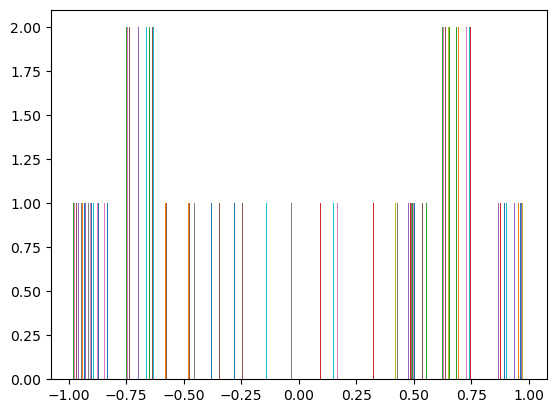

In [343]:
plt.hist(help_cossim)
plt.show()
#more diverse goals here--refer to above and other sim

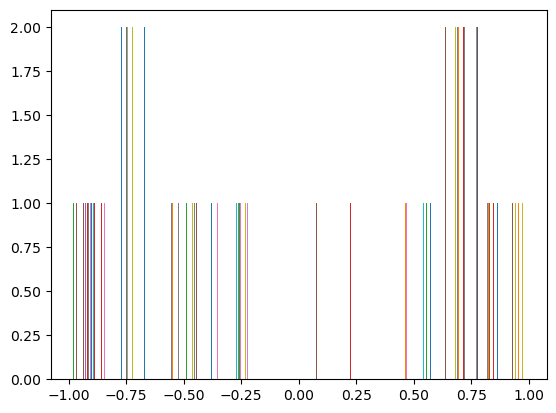

In [344]:
plt.hist(harm_cossim)
plt.show()

In [345]:
#TRAIN

a_trainrange = help_cossim[1:100]

X = a_trainrange
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(X)
 
df.shape


kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df)

label = kmeans.fit_predict(df)
 
print(label)

[1 0 0 1 0 2 0 2 0 0 0 0 1 1 0 0 2 0 0 1 2 0 0 1 1 0 1 2 1 1 0 1 2 2 2 2 0
 1 0 0 1 0 0 0 0 0 1 1 2 2 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0
 1 0 1 0 1 1 0 1 2 0 0 1 1 0 0 1 0 0 2 0 0 0 1 0 0]


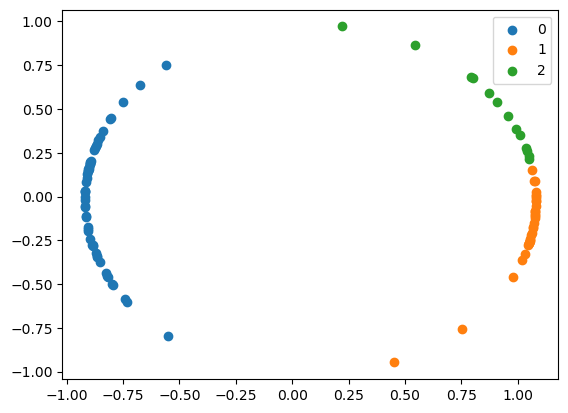

In [346]:
#PLOT TRAIN

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [347]:
#TEST--need pred

Y = np.array(helped[100:400])
pca = PCA(2)
 
#Transform the data
dftest = pca.fit_transform(Y)
 
dftest.shape


kmeanstest = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(dftest)

labeltest = kmeanstest.fit_predict(dftest)
 
print(labeltest)

[1 1 2 0 0 1 2 0 2 1 1 1 2 0 2 1 0 0 0 1 0 0 1 0 0 0 1 2 1 1 1 2 0 1 2 2 0
 0 1 2 1 1 1 0 1 0 1 1 1 2 1 1 2 2 1 1 1 1 2 0 2 1 1 2 0 1 1 1 0 0 1 0 2 0
 1 1 1 2 2 0 1 0 1 1 0 2 1 1 1 2 0 0 1 1 0 2 1 0 1 0 1 1 2 2 1 1 0 2 0 1 1
 2 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 2 0 1 2 2 1 0 1 1 2 0 0 1 2 1 1 1 0 2 1
 1 1 2 1 0 1 0 2 0 1 1 1 0 0 1 2 1 1 0 0 1 0 1 1 0 0 0 2 2 0 1 0 0 0 2 2 1
 0 1 1 1 0 2 2 1 0 0 2 1 2 2 1 1 1 1 2 1 1 0 1 0 1 1 1 0 0 1 1 2 0 1 0 1 1
 1 1 2 1 1 0 2 1 1 1 0 1 1 2 0 2 0 0 0 0 1 1 1 0 1 2 1 1 1 1 0 0 1 2 0 0 0
 2 1 1 0 2 2 0 2 1 2 2 2 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1
 1 1 2 1]


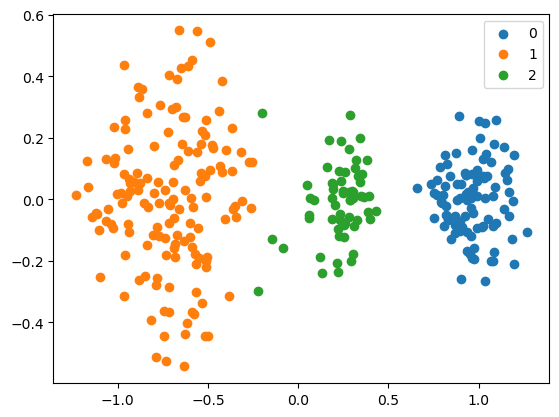

In [348]:
#PLOT TEST

#Getting unique labels
 
u_labelstest = np.unique(labeltest)
 
#plotting the results:
 
for i in u_labelstest:
    plt.scatter(dftest[labeltest == i , 0] , dftest[labeltest == i , 1] , label = i)
plt.legend()
plt.show()

#3 goals among type(s) of agent

In [349]:
#introduce noise from Helper, Hinderer
clean_signal = pd.DataFrame(a_trainrange, dtype=float)
mu, sigma = 0, 0.1 
noise = np.random.normal(mu, sigma, [99, 2])
signal = clean_signal + noise

signal_array = np.array(signal)

In [350]:
embed = []
for s,z in enumerate(signal_array):
    embed.append(np.dot(s,z)/((linalg.norm(s))*(linalg.norm(z))))

/var/folders/yr/874s9zz951xblfgr49l65dlh0000gn/T/ipykernel_7265/3006477263.py:3: RuntimeWarning: invalid value encountered in divide
  embed.append(np.dot(s,z)/((linalg.norm(s))*(linalg.norm(z))))


In [351]:
clean_noise = pd.DataFrame([embed])

In [352]:
clean_noise

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,"[nan, nan]","[-0.9102643551865726, -0.4140275397564436]","[-0.5069397441449459, -0.8619814938885039]","[0.6703075456942558, 0.7420834145736873]","[-0.4533457089094544, -0.8913347677575381]","[0.9039148203376125, 0.42771251743901706]","[-0.42383115085566864, -0.9057412188723442]","[0.9320928030575705, 0.36221955564033415]","[-0.5075268903096718, -0.861635918246561]","[-0.9329801589579929, -0.359927802469771]",...,"[0.7099268131293826, 0.7042754574738205]","[-0.9887631380285612, -0.14949065815599447]","[0.07615233630052051, -0.9970961947956538]","[0.9637482603665, 0.2668132130171684]","[-0.8839757595440816, -0.46753273311979304]","[-0.3398923534858184, -0.940464347033885]","[-0.6932188567977029, -0.7207271443341687]","[0.8573266400024496, 0.5147727968163333]","[-0.6406482549252768, -0.7678344961391078]","[-0.8247641675507577, -0.5654768500339387]"


In [353]:
clean_noise = clean_noise.T

In [354]:
clean_noise = pd.concat([clean_noise[col].explode(ignore_index=True) for col in clean_noise],
                axis="columns")

print(clean_noise)

            0
0         NaN
1         NaN
2   -0.910264
3   -0.414028
4    -0.50694
..        ...
193  0.514773
194 -0.640648
195 -0.767834
196 -0.824764
197 -0.565477

[198 rows x 1 columns]


In [355]:
clean_noise = clean_noise.dropna()
clean_noise = clean_noise.to_numpy()

In [356]:
clean_noise = clean_noise.reshape(98,2)

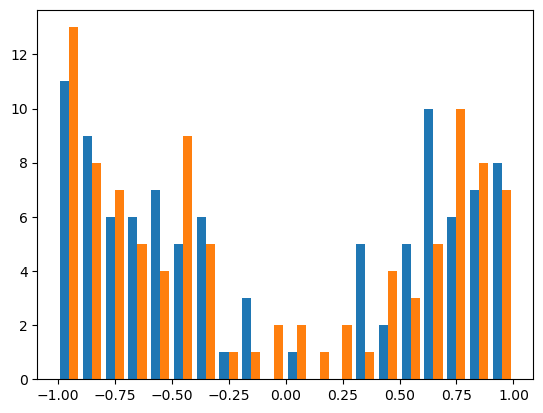

In [357]:
#plot noised data
plt.hist(clean_noise, bins = 20)#any iloc
plt.show()
#showing goal divergence from disruptive noise

In [358]:
clean_noise = pd.DataFrame(clean_noise)

In [359]:
import scipy.stats as ss

meet_scaled = []

#more than one row
needy = []

tol_spiral = [1e-1, 1e-02, 1e-04, 1e-08, 1e-16]

def convergence():
    for cn in clean_noise:
        for a,b in zip(clean_noise[0],clean_noise[1]):
            if np.isclose(a,b, rtol=tol_spiral[1], atol=tol_spiral[4], equal_nan=False):
                count = 1
                while count < 50:
                    goal = a + abs(b - a)
                    #add more lines here--got to goal, but I need iters, given further actions by datapoints as agents
                    meet_scaled.append(goal)
                    count += 1


def disturbance():
    for cn in clean_noise:
        for a,b in zip(clean_noise[0],clean_noise[1]):
            if np.isclose(a,b, rtol=tol_spiral[0], atol=tol_spiral[1], equal_nan=False):
                goal = a - abs(b - a)
                meet_scaled.append(goal)
            else:
                needy.append(b)

In [360]:
disturbance()

In [361]:
meet_scaled

[0.5985316768148242,
 -0.7298104190935781,
 0.6871648863757532,
 -0.8149753273266174,
 -0.7188220055403546,
 0.675261476086221,
 -0.7305867235388371,
 -0.7141794629819114,
 -0.7599980257883979,
 -0.7774660378323324,
 0.7042754574738205,
 -0.7207271443341687,
 0.5985316768148242,
 -0.7298104190935781,
 0.6871648863757532,
 -0.8149753273266174,
 -0.7188220055403546,
 0.675261476086221,
 -0.7305867235388371,
 -0.7141794629819114,
 -0.7599980257883979,
 -0.7774660378323324,
 0.7042754574738205,
 -0.7207271443341687]

In [362]:
def allocate():
    ranks = ss.rankdata([cn for cn in clean_noise])
    if ranks.any() < 10:
        ss.rankdata([i for i in meet_scaled])
        disturbance()
    else:
        ss.rankdata([i for i in meet_scaled])#assign ranks for closeness to goals
        convergence()

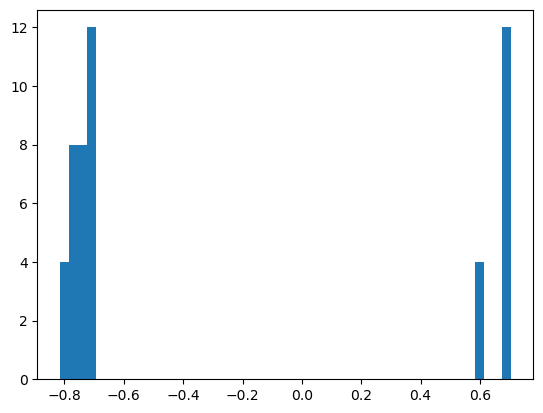

In [363]:
allocate()############

plt.hist(meet_scaled, bins = 50)
plt.show()

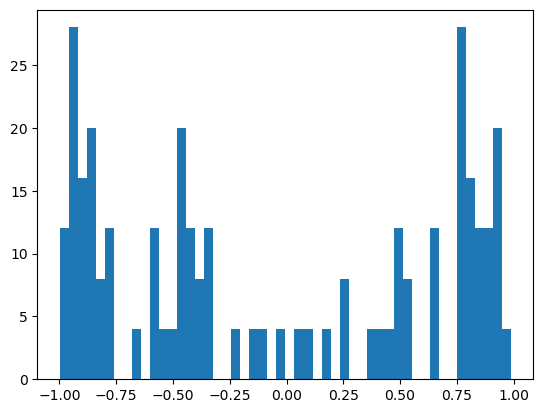

In [364]:
plt.hist(needy, bins = 50)
plt.show()

In [365]:
LIN_SCALE = 0.1
EXP_SCALE = 2.0
SIG_SCALE = 0.0

from numpy.random import default_rng

rng = default_rng(3)

In [366]:
minimum = np.min(needy)

helped = np.array(needy)

noise = rng.normal(scale=SIG_SCALE, size=helped.shape[0])
noise[-1] = 0.0
ran_seq = (
    ((np.arange(helped.shape[0])[::-1] * LIN_SCALE) ** EXP_SCALE) + noise
) + minimum


(array([49., 20., 16., 13., 11., 10., 10.,  9.,  8.,  8.,  7.,  8.,  6.,
         7.,  6.,  7.,  6.,  5.,  6.,  5.,  6.,  5.,  5.,  5.,  5.,  5.,
         5.,  4.,  5.,  4.,  5.,  4.,  4.,  4.,  4.,  5.,  4.,  4.,  3.,
         4.,  4.,  4.,  4.,  3.,  4.,  3.,  4.,  4.,  3.,  4.]),
 array([-9.97096195e-01,  2.25327038e+01,  4.60625038e+01,  6.95923038e+01,
         9.31221038e+01,  1.16651904e+02,  1.40181704e+02,  1.63711504e+02,
         1.87241304e+02,  2.10771104e+02,  2.34300904e+02,  2.57830704e+02,
         2.81360504e+02,  3.04890304e+02,  3.28420104e+02,  3.51949904e+02,
         3.75479704e+02,  3.99009504e+02,  4.22539304e+02,  4.46069104e+02,
         4.69598904e+02,  4.93128704e+02,  5.16658504e+02,  5.40188304e+02,
         5.63718104e+02,  5.87247904e+02,  6.10777704e+02,  6.34307504e+02,
         6.57837304e+02,  6.81367104e+02,  7.04896904e+02,  7.28426704e+02,
         7.51956504e+02,  7.75486304e+02,  7.99016104e+02,  8.22545904e+02,
         8.46075704e+02,  8.6960

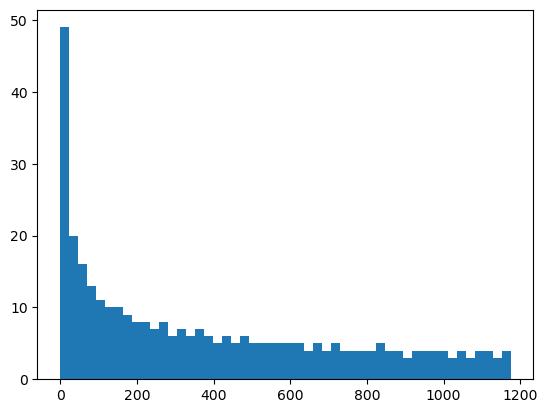

In [367]:
plt.hist(ran_seq, bins = 50)

#iter required to help all x-axis?

In [368]:
ran_train = ran_seq[1:100]

X = ran_train
pca = PCA(1)

X = X.reshape(-1, 1)
 
#Transform the data
df = pca.fit_transform(X)
 
df.shape


kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df)

label = kmeans.fit_predict(df)
 
print(label)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


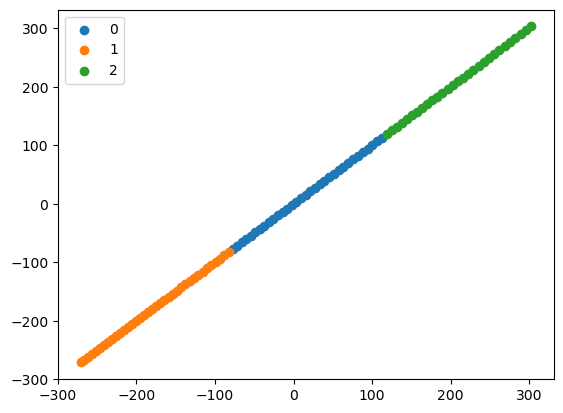

In [369]:
#PLOT TRAIN

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i] , label = i)
plt.legend()
plt.show()

In [370]:
needy_train = needy[1:100]

X = np.array(needy_train)
pca = PCA(1)

X = X.reshape(-1, 1)
 
#Transform the data
df = pca.fit_transform(X)
 
df.shape


kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df)

label = kmeans.fit_predict(df)
 
print(label)

[2 2 0 2 0 2 1 1 2 0 0 1 2 0 1 0 0 2 1 0 0 2 0 1 0 0 2 0 1 1 0 1 1 0 2 2 2
 2 2 1 0 0 0 0 0 1 1 0 1 2 1 0 0 0 1 2 2 0 0 0 2 1 1 1 0 2 0 2 0 0 0 0 2 0
 0 2 1 1 2 0 1 2 0 2 1 1 2 2 0 2 0 2 1 1 2 0 0 1 2]


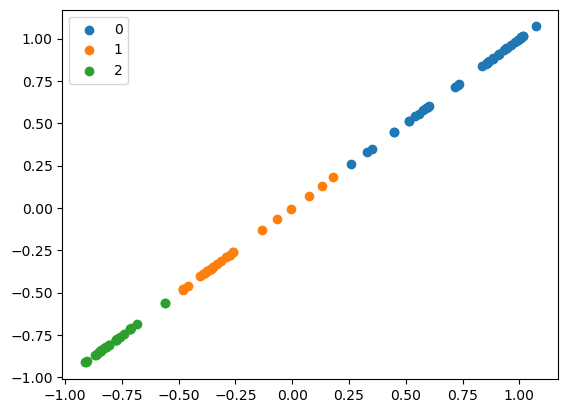

In [371]:
#PLOT TRAIN

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i] , label = i)
plt.legend()
plt.show()

In [372]:
clean_train = clean_noise[1:100]
clean_train

,0,1
1,-0.50694,-0.861981
2,0.670308,0.742083
3,-0.453346,-0.891335
4,0.903915,0.427713
5,-0.423831,-0.905741
...,...,...
93,-0.339892,-0.940464
94,-0.693219,-0.720727
95,0.857327,0.514773
96,-0.640648,-0.767834


In [373]:
X = clean_train
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(X)
 
df.shape


kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df)

label = kmeans.fit_predict(df)
 
print(label)

[1 0 1 2 1 2 1 1 1 1 0 0 1 1 2 1 1 2 2 1 1 0 0 1 0 2 0 0 1 0 2 2 2 2 1 0 1
 1 0 1 1 1 1 1 0 0 2 2 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1
 0 1 0 0 1 0 2 1 1 0 0 1 1 0 1 1 2 1 1 1 2 1 1]


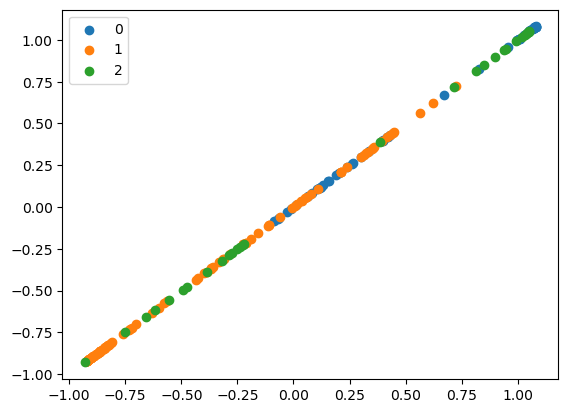

In [374]:
#PLOT TRAIN

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i] , df[label == i] , label = i)
plt.legend()
plt.show()